# Heart Disease Diagnostic Analysis

## VEDANT ADESH KALMEGH

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
data = pd.read_csv("Heart Disease data.csv")

In [134]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [135]:
data.head(20)   #Top 20

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [201]:
data.info()         #Checking the numerical and categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1025 non-null   int64  
 1   cp             528 non-null    object 
 2   trestbps       1025 non-null   int64  
 3   chol           1025 non-null   int64  
 4   fbs            1025 non-null   int64  
 5   restecg        1025 non-null   int64  
 6   thalach        1025 non-null   int64  
 7   exang          1025 non-null   int64  
 8   oldpeak        1025 non-null   float64
 9   slope          951 non-null    object 
 10  ca             1025 non-null   int64  
 11  thal           1025 non-null   object 
 12  Heart_Disease  1025 non-null   object 
 13  Sex            1025 non-null   object 
 14  Age_range      1025 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 120.2+ KB


In [137]:
data.describe()          ## Checking the statistical values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [138]:
data.columns        #Full details about columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

There are fourteen features in Dataset: 

1) - age:The person's age in years

2) - sex: The person's sex (1 = male, 0 = female)

3) - cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4:      asymptomatic)

4) - trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5) - chol: The person's cholesterol measurement in mg/dl

6) - fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7) - restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable      or definite left ventricular hypertrophy by Estes' criteria)

8) - thalach: The person's maximum heart rate achieved

9) - exang: Exercise induced angina (1 = yes; 0 = no)

10) - oldpeak: ST depression induced by exercise relative to rest

11) - slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12) - ca: The number of major vessels (0-3)

13) - thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14) - target: Heart disease (0 = no, 1 = yes)

In [139]:
## Checking the Missing Values as we have to fill them

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Changing the numerical values to cartegorical values for a clear understanding of reports

In [140]:
def cp(row):
    if row == 1:
        return ' typical angina'
    elif row == 2:
        return 'atypical angina'
    elif row == 3:
        return 'non-anginal pain'
    elif row == 4 :
        return 'asymptomatic'

In [141]:
data['cp'] = data['cp'].apply(cp)

In [142]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,None,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,None,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,None,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,None,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,None,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,typical angina,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,None,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,None,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,None,110,254,0,0,159,0,0.0,2,0,2,1


In [143]:
def slope(row):
    if row == 1:
        return 'upsloping'
    elif row == 2:
        return 'flat'
    elif row == 3:
        return 'downsloping'

In [144]:
data['slope'] = data['slope'].apply(slope)

In [145]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,None,125,212,0,1,168,0,1.0,flat,2,3,0
1,53,1,None,140,203,1,0,155,1,3.1,None,0,3,0
2,70,1,None,145,174,0,1,125,1,2.6,None,0,3,0
3,61,1,None,148,203,0,1,161,0,0.0,flat,1,3,0
4,62,0,None,138,294,1,1,106,0,1.9,upsloping,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,typical angina,140,221,0,1,164,1,0.0,flat,0,2,1
1021,60,1,None,125,258,0,0,141,1,2.8,upsloping,1,3,0
1022,47,1,None,110,275,0,0,118,1,1.0,upsloping,1,2,0
1023,50,0,None,110,254,0,0,159,0,0.0,flat,0,2,1


In [146]:
def thal(row):
    if row == 3:
        return 'normal'
    elif row == 6:
        return 'fixed defect'
    elif row == 7:
        return 'reversable defect'

In [147]:
data['thal'] = data['thal'].apply(thal)

In [148]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,None,125,212,0,1,168,0,1.0,flat,2,normal,0
1,53,1,None,140,203,1,0,155,1,3.1,None,0,normal,0
2,70,1,None,145,174,0,1,125,1,2.6,None,0,normal,0
3,61,1,None,148,203,0,1,161,0,0.0,flat,1,normal,0
4,62,0,None,138,294,1,1,106,0,1.9,upsloping,3,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,typical angina,140,221,0,1,164,1,0.0,flat,0,None,1
1021,60,1,None,125,258,0,0,141,1,2.8,upsloping,1,normal,0
1022,47,1,None,110,275,0,0,118,1,1.0,upsloping,1,None,0
1023,50,0,None,110,254,0,0,159,0,0.0,flat,0,None,1


#### Removing the outliers from the coumns

In [149]:
data['thal'].unique()

array(['normal', None], dtype=object)

In [150]:
#Replacing the outliers (None with mode)

data['thal'].mode()[0]

'normal'

In [151]:
data['thal'] = data['thal'].fillna('normal')

In [152]:
data['thal'].unique()

array(['normal'], dtype=object)

In [153]:
data['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [154]:
data['ca'] = data['ca'].replace(-100000, 0)

In [155]:
data['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

### Now Our data is clear & simple so we can continue with E.D.A

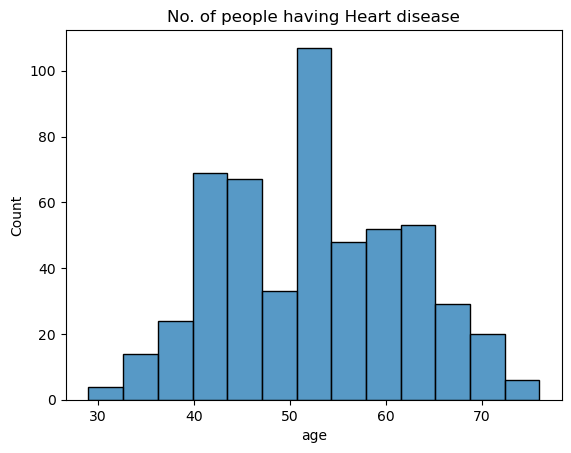

In [156]:
Person_having_Heart_Disease = data.age.where(data.target == 1)

sns.histplot(Person_having_Heart_Disease)
plt.title('No. of people having Heart disease');

#### Above plot shows that count of people having Heart Disease at different age, and people with age between 50-55 has highest count.

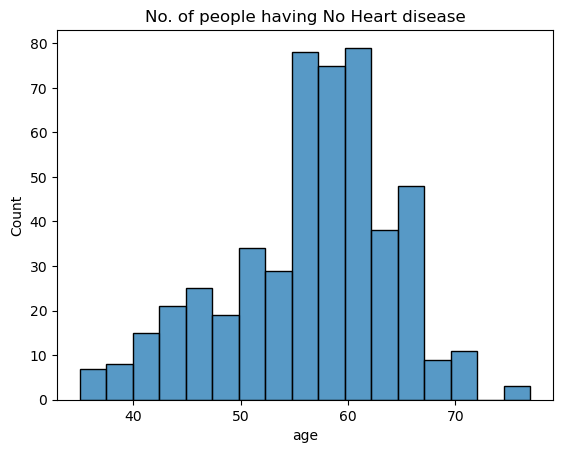

In [157]:
Healthy_Person = data.age.where(data.target == 0)

sns.histplot(Healthy_Person)
plt.title('No. of people having No Heart disease');

##### Above plot shows that count of people having No Heart Disease at different age, and people with age between 55-65 has highest count.

In [158]:
def heart_disease(row):
    if row == 0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [159]:
data.groupby('target').size()

target
0    499
1    526
dtype: int64

In [160]:
data['Heart_Disease'] = data['target'].apply(heart_disease)


##### Here we have created a column named Heart_Disease for a better Visulisation 

In [161]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,None,125,212,0,1,168,0,1.0,flat,2,normal,0,Absence
1,53,1,None,140,203,1,0,155,1,3.1,None,0,normal,0,Absence
2,70,1,None,145,174,0,1,125,1,2.6,None,0,normal,0,Absence
3,61,1,None,148,203,0,1,161,0,0.0,flat,1,normal,0,Absence
4,62,0,None,138,294,1,1,106,0,1.9,upsloping,3,normal,0,Absence


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>],
       [<AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

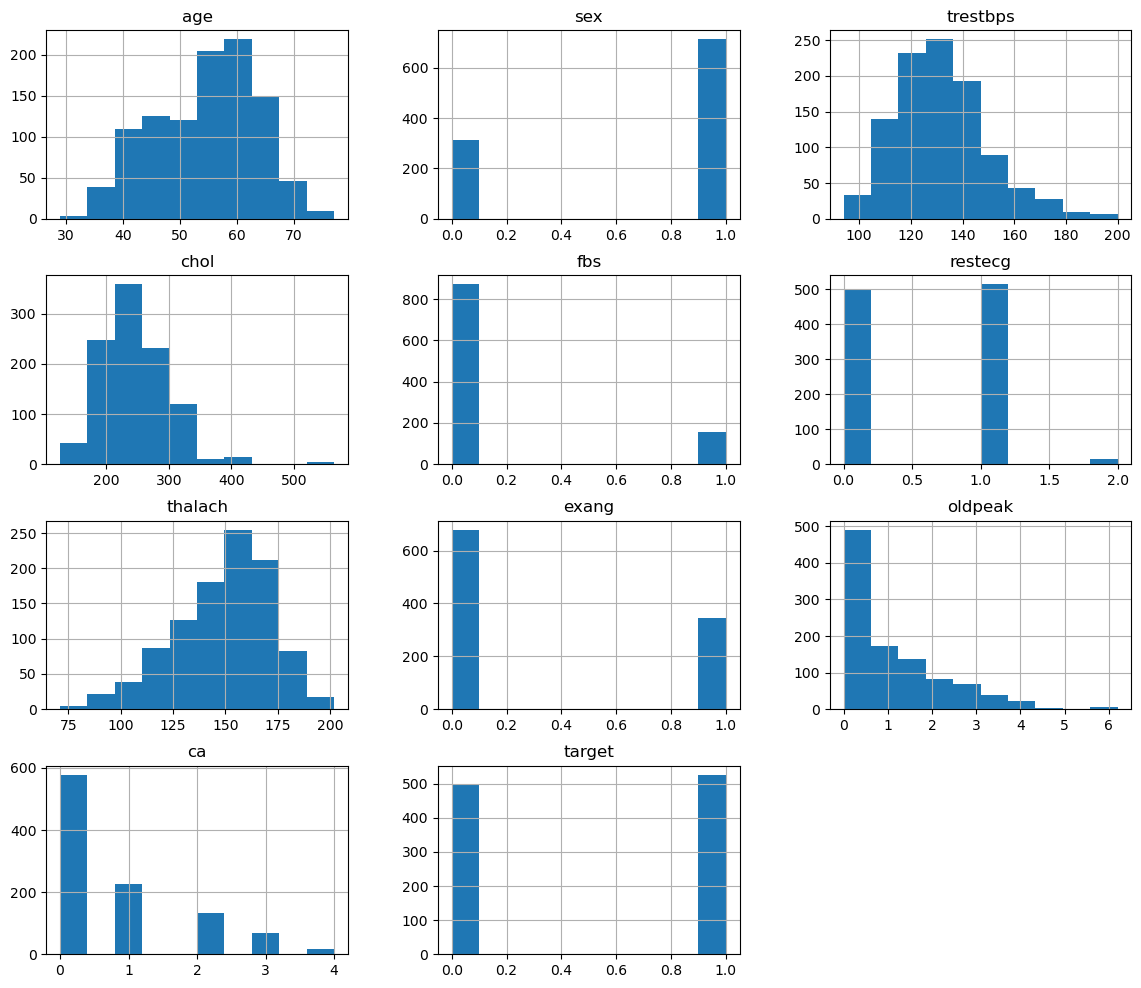

In [162]:
data.hist(figsize = (14,12))

In [163]:
data.shape

(1025, 15)

In [164]:
##Dropping the num column as we have Heart_Disease column

data.drop('target',axis=1,inplace=True)

In [165]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
0,52,1,None,125,212,0,1,168,0,1.0,flat,2,normal,Absence
1,53,1,None,140,203,1,0,155,1,3.1,None,0,normal,Absence
2,70,1,None,145,174,0,1,125,1,2.6,None,0,normal,Absence
3,61,1,None,148,203,0,1,161,0,0.0,flat,1,normal,Absence
4,62,0,None,138,294,1,1,106,0,1.9,upsloping,3,normal,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,typical angina,140,221,0,1,164,1,0.0,flat,0,normal,Presence
1021,60,1,None,125,258,0,0,141,1,2.8,upsloping,1,normal,Absence
1022,47,1,None,110,275,0,0,118,1,1.0,upsloping,1,normal,Absence
1023,50,0,None,110,254,0,0,159,0,0.0,flat,0,normal,Presence


## Calculating How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset

C:\Users\91883\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heart_Disease', ylabel='count'>

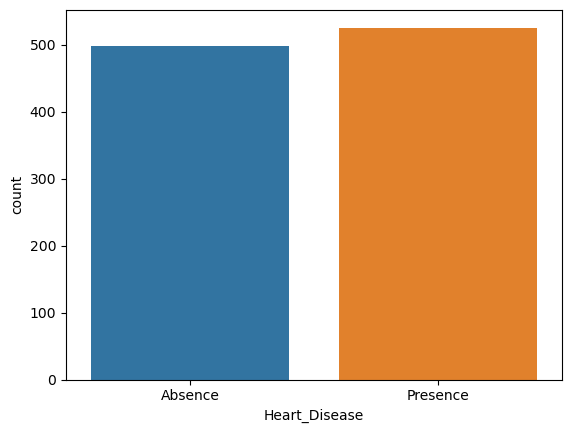

In [166]:

sns.countplot(data['Heart_Disease'])

In [167]:
hd = data.groupby('Heart_Disease').size()

In [168]:
hd

Heart_Disease
Absence     499
Presence    526
dtype: int64

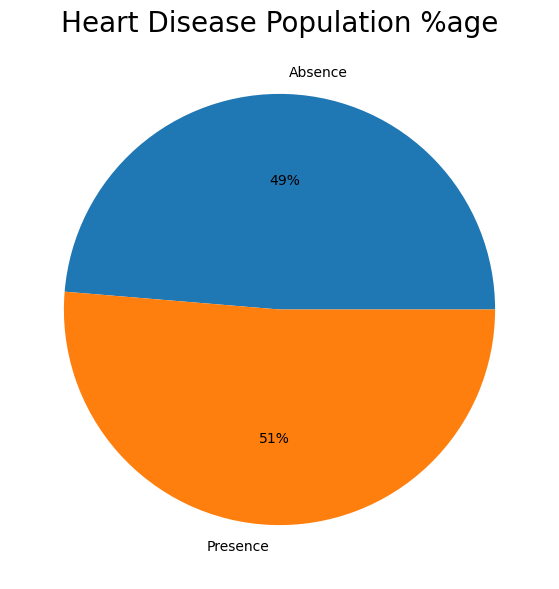

In [169]:

plt.figure(figsize=(10,7))
plt.pie(hd,labels=['Absence','Presence'],autopct='%0.0f%%')
plt.title("Heart Disease Population %age",fontsize=20)
plt.show()

### From the overall population, people having heart disease are 49% and those who doesn't have heart disease are 51%

## Finding the Count of Male & Female in this Dataset

In [170]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

C:\Users\91883\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


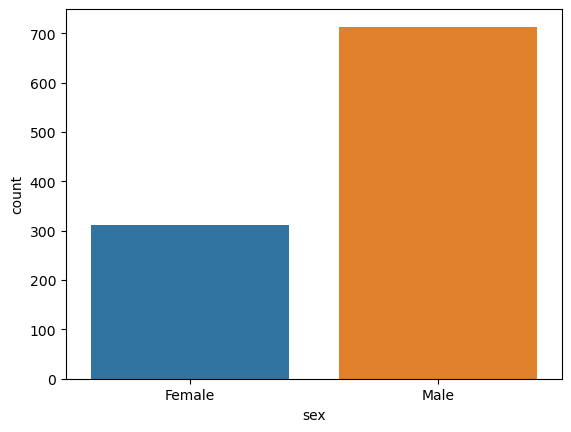

In [171]:
sns.countplot(data['sex'])
plt.xticks([0,1],['Female', 'Male'])
plt.show()

## Finding the Gender distribution accoding to the Heart_Disease

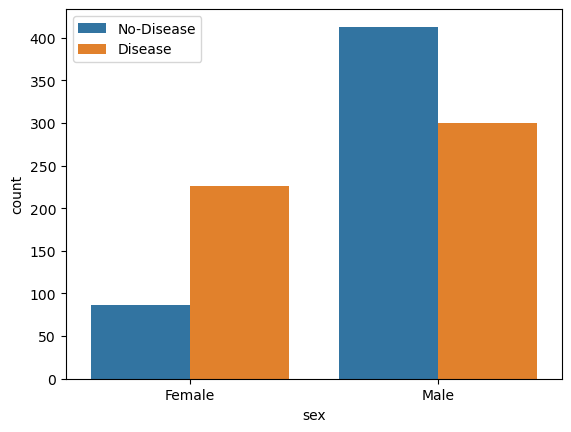

In [172]:
sns.countplot(x='sex',hue="Heart_Disease",data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

## Check Chest Pain Type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

C:\Users\91883\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


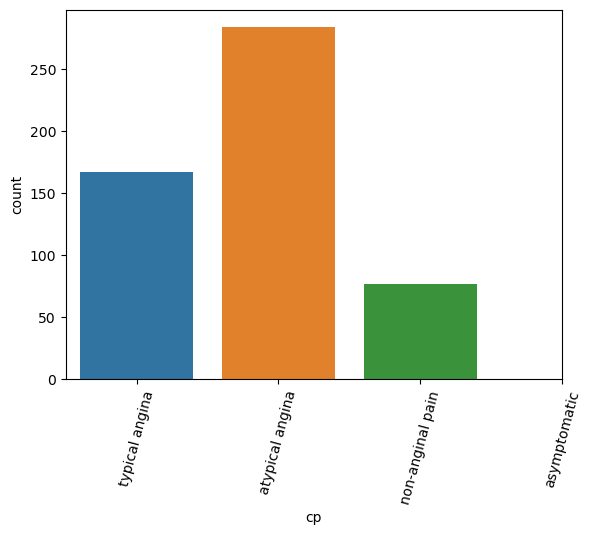

In [173]:
sns.countplot(data['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.xticks(rotation=75)
plt.show()

### Showing The Chest Pain Distribution As Per the Heart_Disease

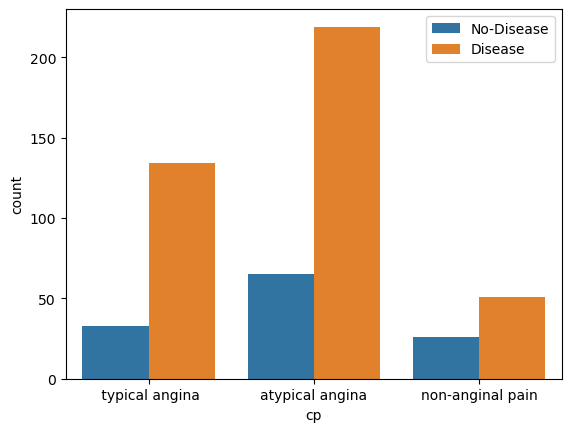

In [174]:
sns.countplot(x="cp", hue="Heart_Disease", data=data)
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

### Show Fasting Blood Sugar Level Distribution According To Heart_Disease

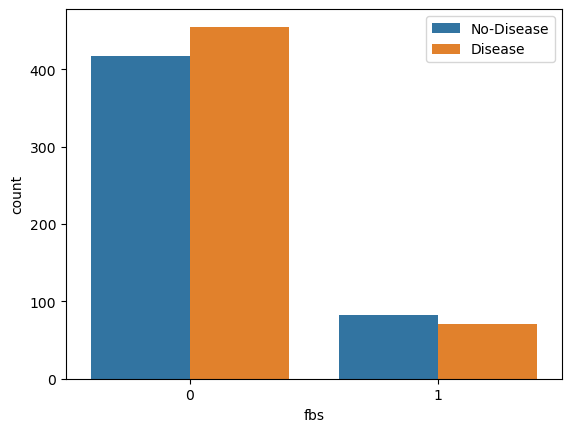

In [175]:
sns.countplot(x="fbs", hue="Heart_Disease", data=data)
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

### Checking Resting Blood Pressure Distribution

<AxesSubplot:>

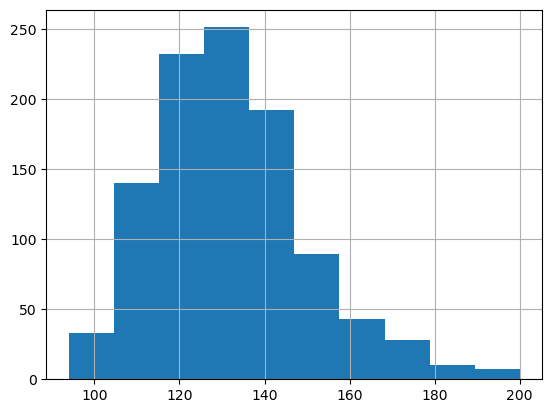

In [176]:
data['trestbps'].hist()

### Checking cholesterol measurement Distribution

<AxesSubplot:>

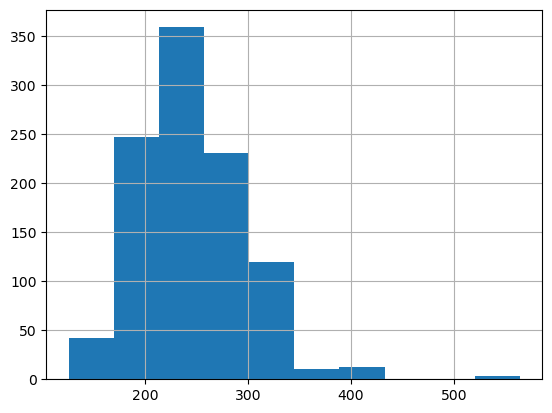

In [177]:
data['chol'].hist()

#### Basic stats of the dataset

In [178]:
Min_age = data['age'].min()
Max_age = data['age'].max()
Mean_age = data['age'].mean()
print("Minimum age is: {0}\nMaximum age is: {1}\nMean of Age is: {2}".format(Min_age,Max_age,Mean_age))

Minimum age is: 29
Maximum age is: 77
Mean of Age is: 54.43414634146342


##### Converting the age column into three subclass 

In [179]:
Young_age = data[(data['age']>=29) & (data['age']<40)]
Mid_age = data[(data['age']>=40) & (data['age'] <55)]
Old_age = data[(data['age']>=55)]

In [180]:
print("Number of Young age people are: {0}\nNumber of Middly age people are: {1}\nNumber of Elder age People are: {2}".format(len(Young_age),len(Mid_age),len(Old_age)))

Number of Young age people are: 57
Number of Middly age people are: 419
Number of Elder age People are: 549


### Showing the count of  age distribution According To Heart_Disease

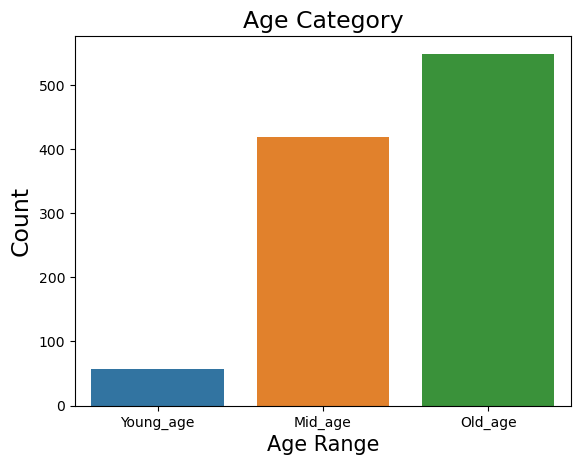

In [181]:
sns.barplot(x=['Young_age','Mid_age','Old_age'],y=[len(Young_age),len(Mid_age),len(Old_age)])
plt.title('Age Category',fontsize=17)
plt.xlabel(xlabel='Age Range',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=17)
plt.show()

In [182]:
#Converting Numerical Data into Categorical Data
# Male = 1 and female = 0

def Sex(row):
    if (row==1):
        return 'Male'
    elif (row==0):
        return 'Female'

In [183]:
data['Sex']=data['sex'].apply(Sex)

In [184]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,Sex
0,52,1,None,125,212,0,1,168,0,1.0,flat,2,normal,Absence,Male
1,53,1,None,140,203,1,0,155,1,3.1,None,0,normal,Absence,Male
2,70,1,None,145,174,0,1,125,1,2.6,None,0,normal,Absence,Male
3,61,1,None,148,203,0,1,161,0,0.0,flat,1,normal,Absence,Male
4,62,0,None,138,294,1,1,106,0,1.9,upsloping,3,normal,Absence,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,typical angina,140,221,0,1,164,1,0.0,flat,0,normal,Presence,Male
1021,60,1,None,125,258,0,0,141,1,2.8,upsloping,1,normal,Absence,Male
1022,47,1,None,110,275,0,0,118,1,1.0,upsloping,1,normal,Absence,Male
1023,50,0,None,110,254,0,0,159,0,0.0,flat,0,normal,Presence,Female


In [185]:
#Dropping the sex column
data.drop('sex',axis=1,inplace=True)


In [186]:
data.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,Sex
0,52,None,125,212,0,1,168,0,1.0,flat,2,normal,Absence,Male
1,53,None,140,203,1,0,155,1,3.1,None,0,normal,Absence,Male
2,70,None,145,174,0,1,125,1,2.6,None,0,normal,Absence,Male
3,61,None,148,203,0,1,161,0,0.0,flat,1,normal,Absence,Male
4,62,None,138,294,1,1,106,0,1.9,upsloping,3,normal,Absence,Female


In [187]:
def Age_range(row):
    if (row>=29 and row <40):
        return 'Young age'
    elif(row >=40 and row <55):
        return 'Mid age'
    elif (row >= 55 and row <78):
        return 'Old age'

In [188]:
data['Age_range']=data['age'].apply(Age_range)

In [189]:
data.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,Sex,Age_range
0,52,None,125,212,0,1,168,0,1.0,flat,2,normal,Absence,Male,Mid age
1,53,None,140,203,1,0,155,1,3.1,None,0,normal,Absence,Male,Mid age
2,70,None,145,174,0,1,125,1,2.6,None,0,normal,Absence,Male,Old age
3,61,None,148,203,0,1,161,0,0.0,flat,1,normal,Absence,Male,Old age
4,62,None,138,294,1,1,106,0,1.9,upsloping,3,normal,Absence,Female,Old age


### Checking the Heart Disease based on age range

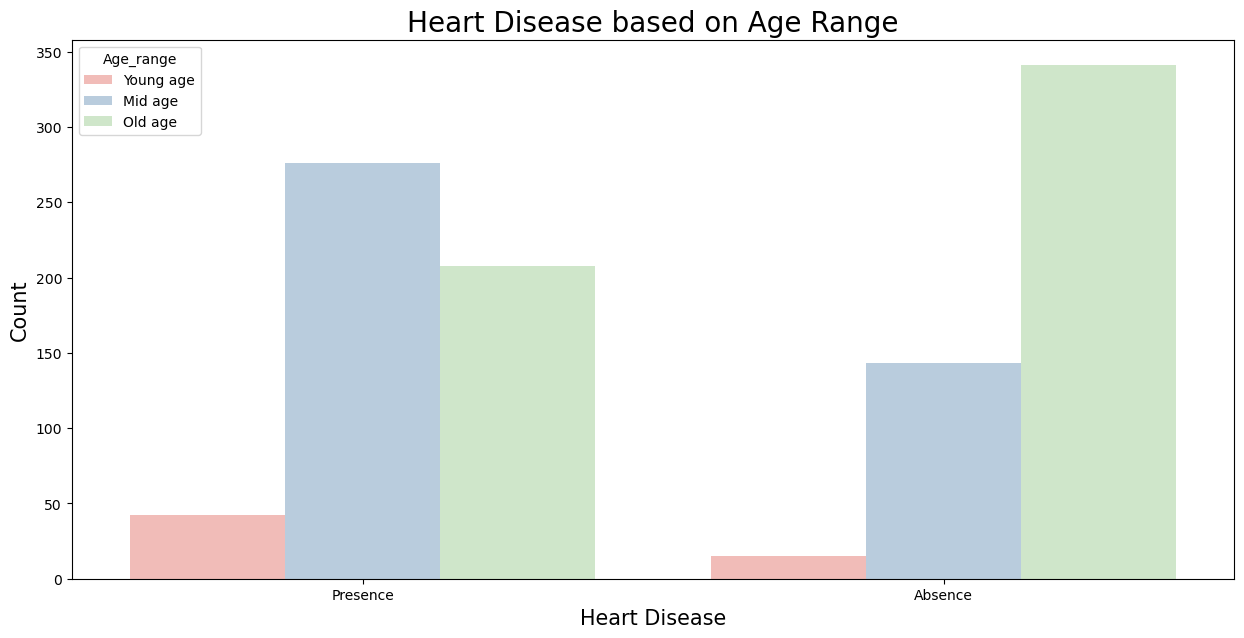

In [190]:
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue='Age_range',data=data,order=['Presence','Absence'],hue_order=['Young age','Mid age','Old age'],palette='Pastel1')
plt.title("Heart Disease based on Age Range",fontsize=20)
plt.xlabel(xlabel='Heart Disease',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=15)
plt.show()

### Mid age people are more affected by Heart Disease compared to other ages and Old aged people are more free from Heart Disease compared to other ages

## Chest pain based on gender

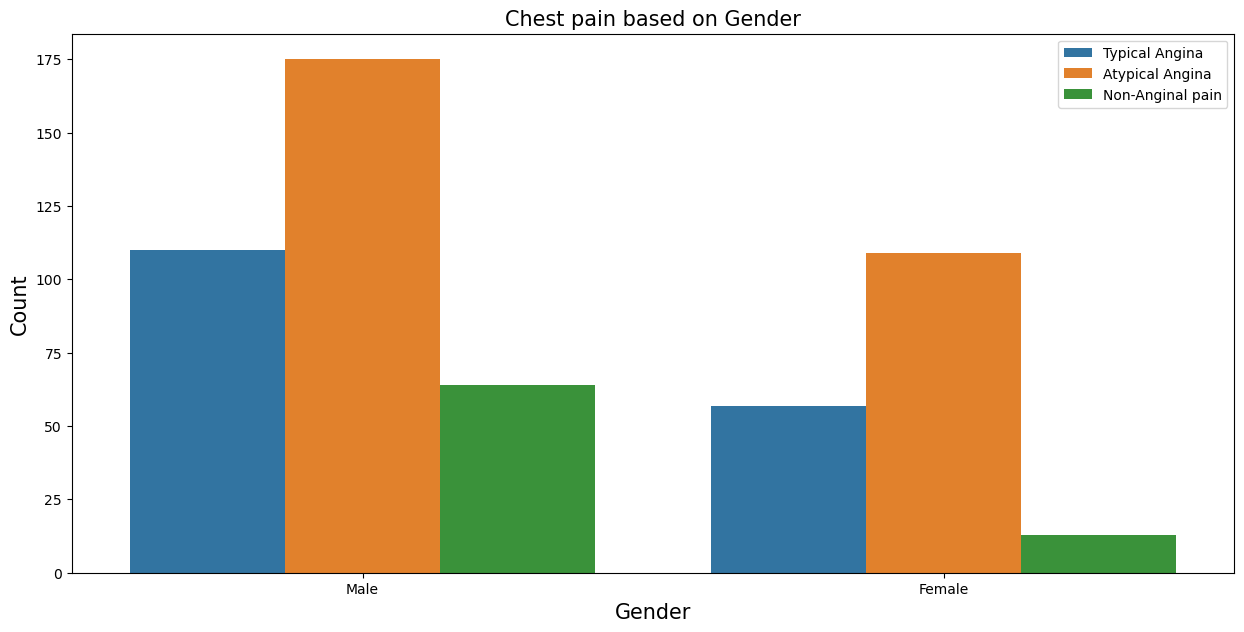

In [191]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex',hue='cp',data=data)
plt.title("Chest pain based on Gender",fontsize=15)
plt.xlabel(xlabel='Gender',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

#### We can see that a higher number of men are suffering from Asymptomatic type of Chest Pain

### Checking the Chest pain based on Gender Category

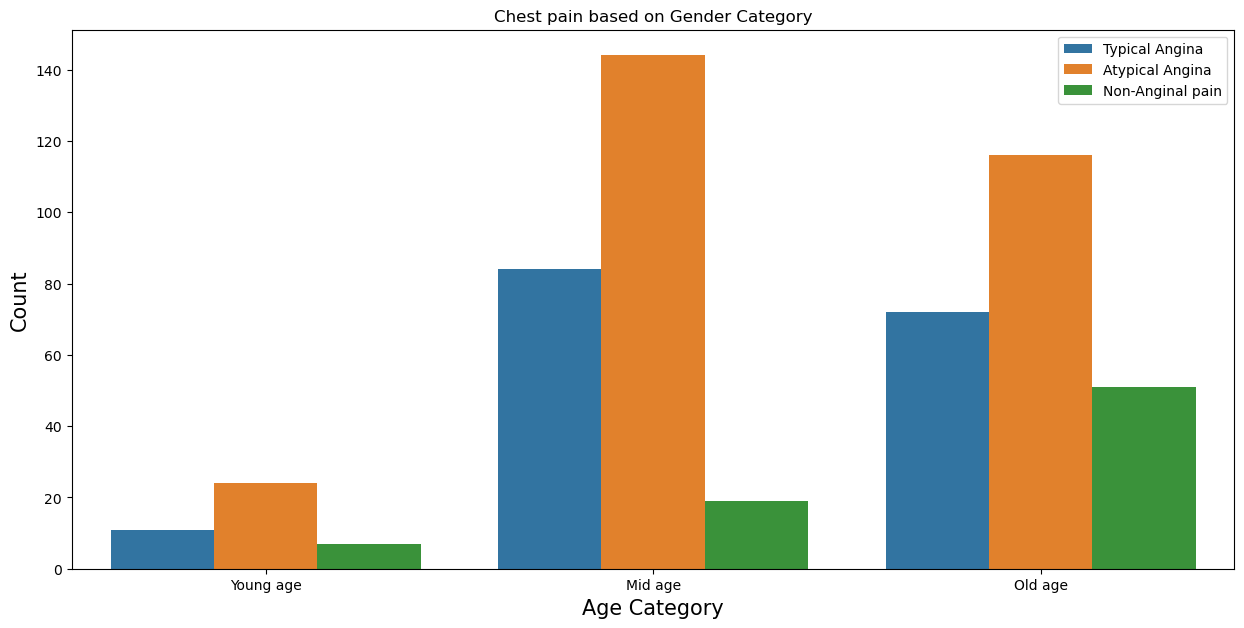

In [192]:
plt.figure(figsize=(15,7),frameon=True)
sns.countplot(x='Age_range',hue='cp',data=data,order=['Young age','Mid age','Old age'])
plt.xlabel(xlabel='Age Category',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=15)
plt.title("Chest pain based on Gender Category")
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

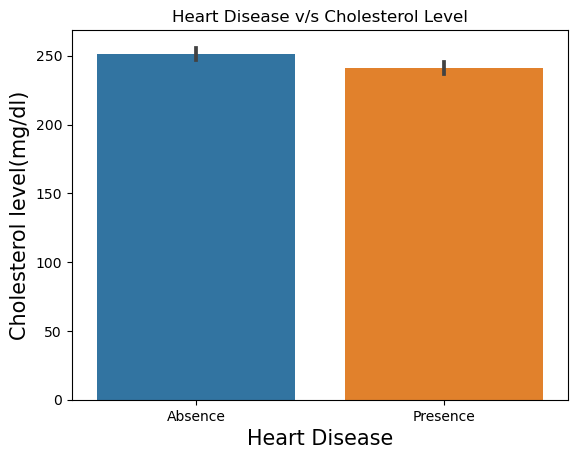

In [193]:
plt.figure()
sns.barplot(x='Heart_Disease',y='chol',data=data)
plt.xlabel(xlabel='Heart Disease',fontsize=15)
plt.ylabel(ylabel='Cholesterol level(mg/dl)',fontsize=15)
plt.title("Heart Disease v/s Cholesterol Level")
plt.show()

#### More Cholesterol means More chance of Heart Disease

### Checking maximum Heart rate achived 

[Text(0.5, 0, 'maximum heart rate achieved')]

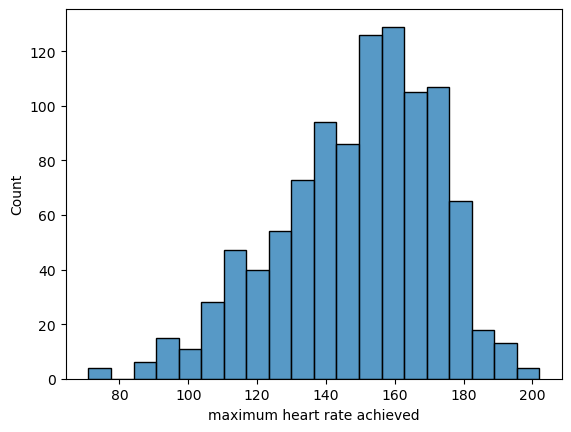

In [194]:
fig = sns.histplot(data['thalach'], bins= 20)
fig.set(xlabel = 'maximum heart rate achieved')

#### The maximum heart rate achieved seems to be between 150 - 170.

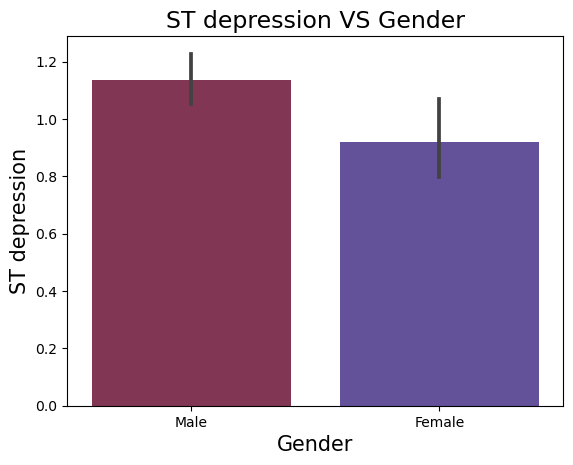

In [195]:
sns.barplot(x='Sex', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Gender', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

#### Males are more prone to ST dipression

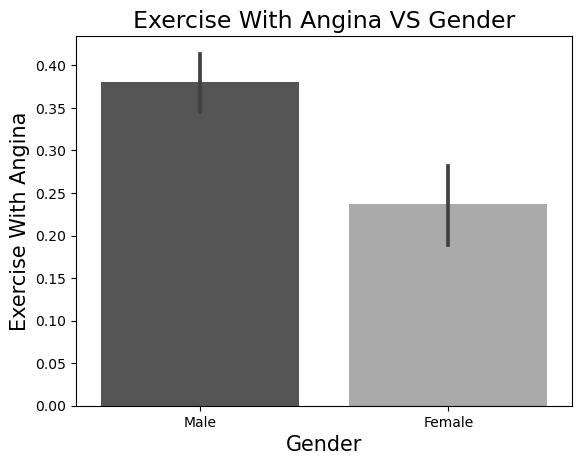

In [196]:
sns.barplot(x='Sex', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

#### Males have have high Exercise Angina

#### Angina is a type of chest pain caused by reduced blood flow to the heart.

## Correlations

###### Now that we analyzed all the factors, let's see what the corrolation heatmap gives us:

<AxesSubplot:>

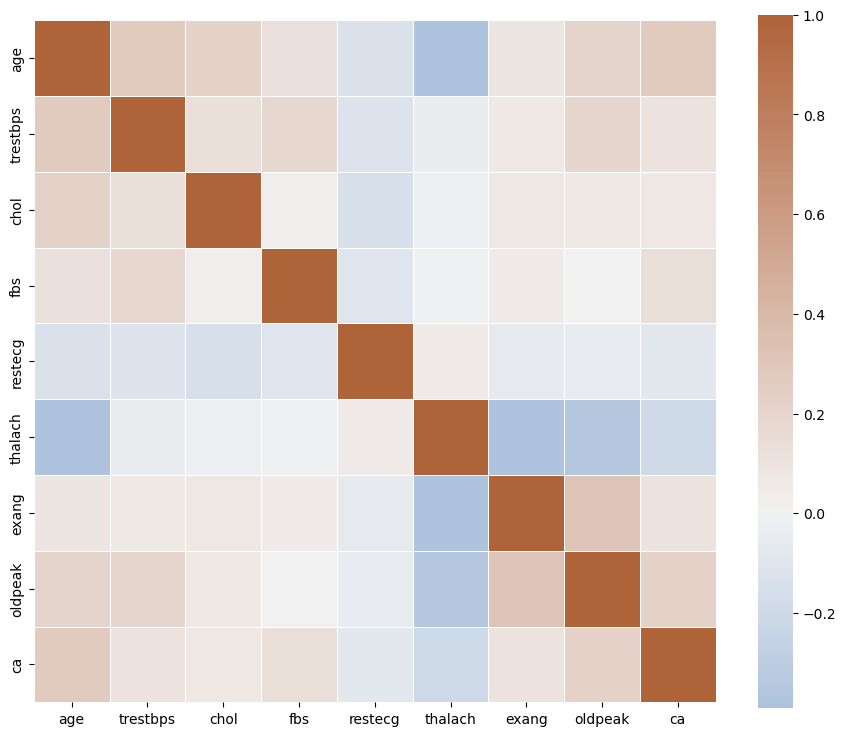

In [197]:
corr = data.corr()
plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 30, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5)

<AxesSubplot:>

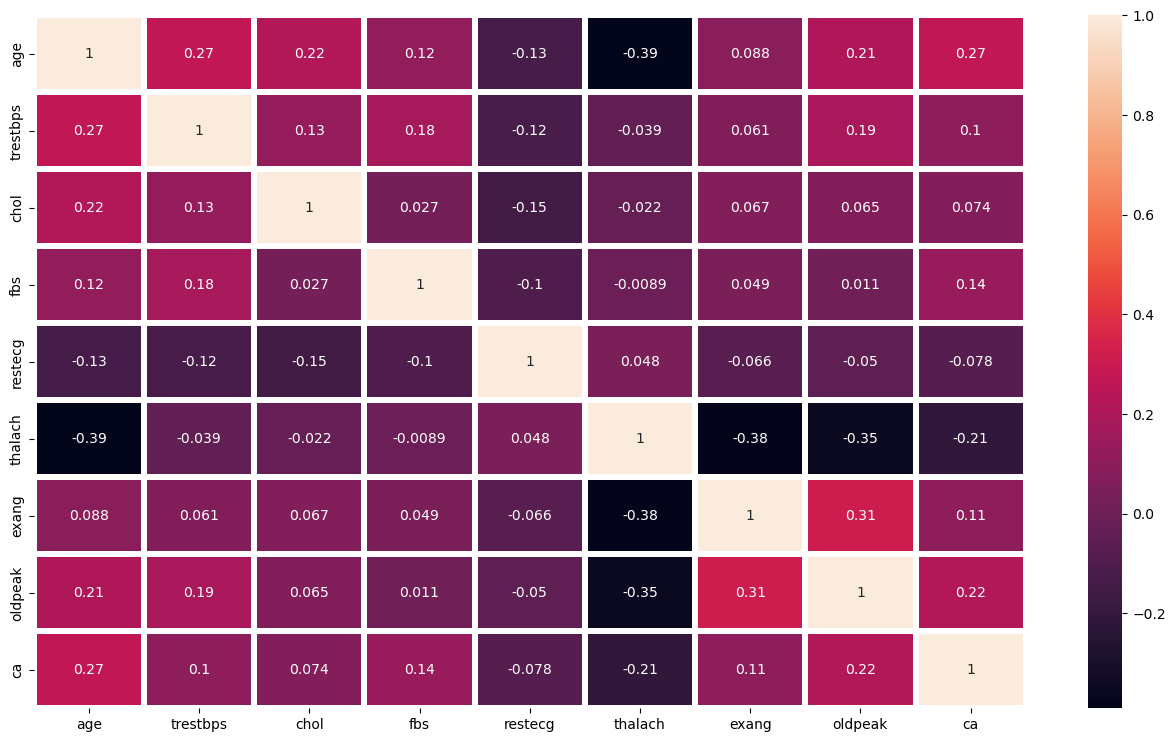

In [198]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)

##### Checking the dataset to check un-wanted values

In [199]:
data

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,Sex,Age_range
0,52,None,125,212,0,1,168,0,1.0,flat,2,normal,Absence,Male,Mid age
1,53,None,140,203,1,0,155,1,3.1,None,0,normal,Absence,Male,Mid age
2,70,None,145,174,0,1,125,1,2.6,None,0,normal,Absence,Male,Old age
3,61,None,148,203,0,1,161,0,0.0,flat,1,normal,Absence,Male,Old age
4,62,None,138,294,1,1,106,0,1.9,upsloping,3,normal,Absence,Female,Old age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,typical angina,140,221,0,1,164,1,0.0,flat,0,normal,Presence,Male,Old age
1021,60,None,125,258,0,0,141,1,2.8,upsloping,1,normal,Absence,Male,Old age
1022,47,None,110,275,0,0,118,1,1.0,upsloping,1,normal,Absence,Male,Mid age
1023,50,None,110,254,0,0,159,0,0.0,flat,0,normal,Presence,Female,Mid age


In [200]:
data.to_csv('Heart Disease Final dataset.csv', index=False)

## Conclusions:
1) From target value we can say that our dataset is amost balanced with 49% of patients having no heart disease and 51 % of patients having heart disease.

2) Males have higher chances of having heart disease than females.

3) Patients with age >55 years and having resting blood suger( i.e in diastolic state) in range 121-140 mm Hg have higher chances of heart disease. patients with age group 40 to 45 have little chances and age below 40 has negligiable cgances of having a heart disease.

4) Patients suffering from heart disease are mostly in age group of 50-55 years.

5) Higher cholesterol means higher chances of heart disease. it plays an important role in determining heart problems. With age cholesterol increases and level 200- 350 mg/dl are of concern.

6) Patients showing definite left ventricular hypertrophy in Resting electrocardiographic measurement are more likely to suffer from a heart disease.

7) Patients who are likely to suffer from heart disease have higher maximum heart rates( rate between 140-160) whereas patients who are not likely to suffer from heart disease are having lower maximum heart rates.

8) Exercise induced anginal pain slightly higher chances of getting heart disease than without exercise induced pain.

9) Patients having no thalassaemia can also suffer from heart disease, but patients having reversable effect thalassaemia have greater chances of suffering from heart disease. So thalassaemia plays an important role in detecting heart disease.

10) St_depression >0.5 mm in ECG indicates abnormality. Therefore the slope of the peak exercise ST segment showing downslope with st_depression>0.5 mm has greater chances of heart disease.


# thank you !!